# Proyecto 2
# Descripción

Proyecto 2-Parte I (Core)

Proyecto 2: Análisis Inicial y Selección de Problema

Objetivo: Realizar un análisis exploratorio de datos (EDA) inicial para al menos cuatro conjuntos de datos, diagnosticar y elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción). Entregar un repositorio con el dataset elegido, el EDA inicial y la problemática seleccionada.

Parte I: Búsqueda y Análisis de Conjuntos de Datos

Instrucciones

1. Búsqueda de Conjuntos de Datos:
- Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
- Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.
2. Análisis Exploratorio de Datos (EDA) Inicial:
- Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
- Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
- Documentar los hallazgos de cada EDA en un notebook de Jupyter.
3. Diagnóstico y Selección de Problema:
- Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.
- Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).
- Justificar la elección del problema y explicar por qué es relevante y desafiante.
4. Creación del Repositorio en GitHub:
- Crear un repositorio en GitHub para el Proyecto 2.
- Incluir el EDA inicial de los cuatro conjuntos de datos en notebooks separados.
- Incluir una carpeta para el dataset elegido con su EDA correspondiente.
- Documentar la problemática seleccionada y justificar la elección en un archivo README.md.

Detalles del EDA Inicial

1. Descripción del Conjunto de Datos:
- Breve descripción de cada conjunto de datos, incluyendo la fuente, el tamaño y las variables.
2. Análisis Estadístico Descriptivo:
- Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.
- Analizar la distribución de las variables categóricas.
3. Visualizaciones:
- Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).
- Visualizar las correlaciones entre variables (mapa de calor de correlación).
4. Identificación de Valores Nulos y Outliers:
- Detectar valores nulos y discutir cómo podrían ser tratados.
- Identificar outliers y evaluar su impacto potencial en el análisis.
5. Resumen de Hallazgos:
- Resumir los principales hallazgos de cada EDA, destacando las características y desafíos únicos de cada conjunto de datos.

Contenido del Archivo README.md

- Título del Proyecto: Análisis Inicial y Selección de Problema
- Descripción: Breve descripción del objetivo del proyecto y su importancia.
- Conjuntos de Datos Analizados: Descripción breve de los cuatro conjuntos de datos analizados.
- Resumen del EDA Inicial: Resumen de los hallazgos principales de los EDA realizados.
- Problema Seleccionado: Descripción detallada del problema seleccionado, la justificación de la elección y los objetivos específicos.
- Instrucciones para Ejecutar: Pasos para ejecutar los notebooks y reproducir los resultados.
- Autores: Nombres y roles de los participantes en el proyecto.
- Licencia: Información sobre la licencia del proyecto.

# Data Set 1

In [1]:
import pandas as pd

df1 = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/student_scores.csv')
print(df1.head())


   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [4]:
#Calculo la cantidad de datos nulos
df1.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
#No tenemos datos nulos... Ahora veo los tipos de datos
print(df1.dtypes)

Hours     float64
Scores      int64
dtype: object


In [6]:
#Los tipos de datos son correctos...
print(df1.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


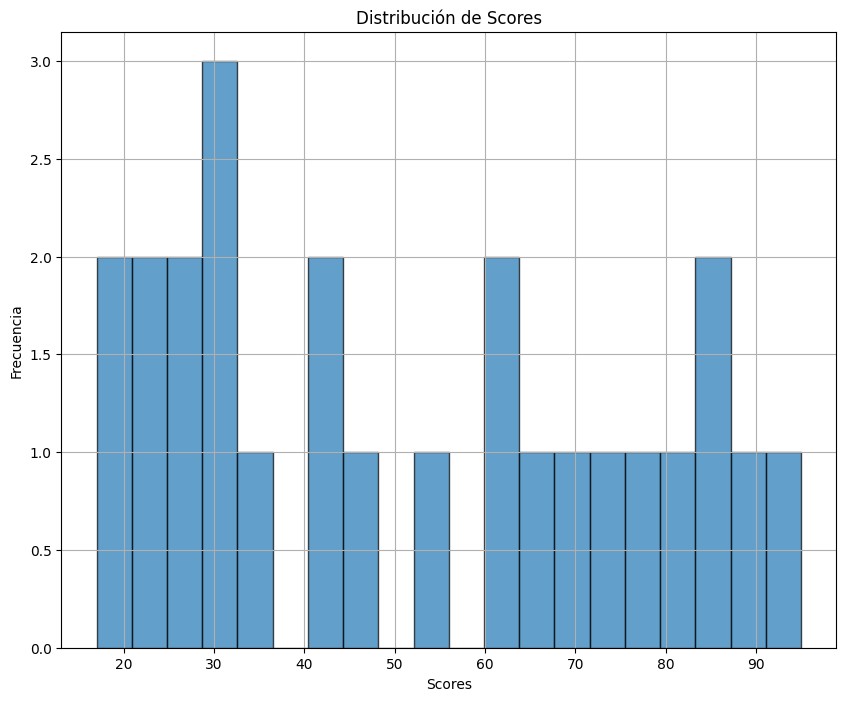

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.hist(df1['Scores'], bins = 20, edgecolor = 'black', alpha = 0.7)
plt.title('Distribución de Scores')
plt.xlabel('Scores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [9]:
# Con este gráfico vemos que los scores se concentran en ciertos valores específicos (como 30),
#también hay menos datos en otros rasgos...
import plotly.express as px

fig = px.box(df1, y = 'Hours', title='Distribución de Hours')
fig.show()

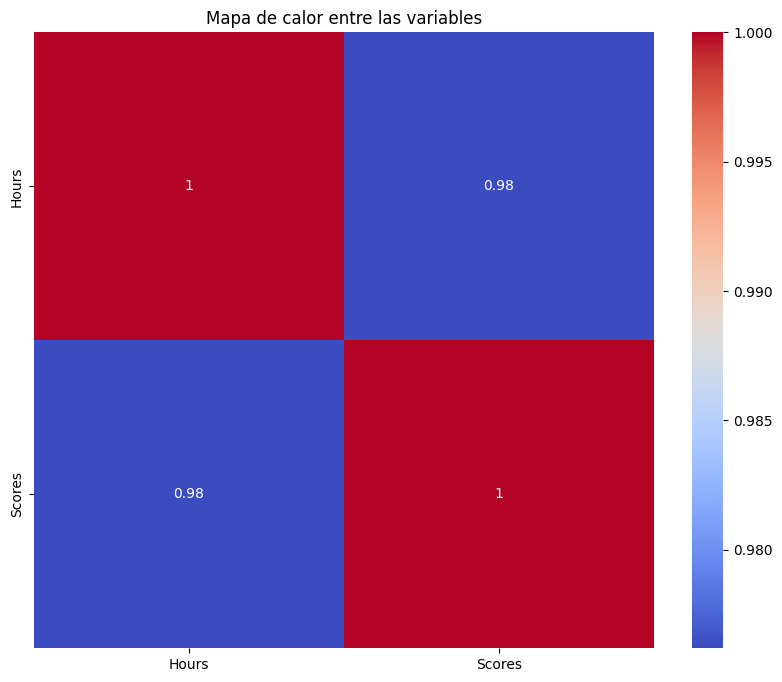

In [13]:
#La mediana indica que, en promedio los valores están alrededor de 4 horas.
#La distribución es casi simétrica ya que la mediana está casi en 5.
#Los valores de hours van típicamente entre 2.7 y 7.4
#Mapa de calor
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Mapa de calor entre las variables')
plt.show()

Conclusión inicial

El valor de correlación 0.98 indica que están casi linealmente relacionados. Quiere decir que con más horas dedicadas hay mejores puntajes obtenidos.

La problemática a abordar puedo definir como regresión. Quiere decir predecir una variable continua, como las puntuaciones de los estudiantes.

La calidad de las predicciones depende en gran medida de la correlación.

Como el dataset es limitado, hay una mayor dificultad para quitar predicciones buenas, pero eso lo veremos más adelante.

In [14]:
# Hago los modelos predictivos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df1 = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/student_scores.csv')

#Selecciono la variable objetivo y la separo
X = df1.drop('Scores', axis = 1) 
y = df1['Scores'] 

#Ahora divido los conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Ahora hago el pipeline, utilizo pipeline porque lo utilicé en otros proyectos y la verdad que me gusta mucho su funcionamiento.

num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creo los modelos
pipeline_LR = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesamiento definido previamente
    ('regressor', LinearRegression())
])

pipeline_KNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

pipeline_DT = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(criterion='squared_error', max_depth=None, random_state=42))
])

pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, random_state=42))
])

pipeline_XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(eval_metric='rmse', random_state=42))
])

# Entreno los modelos
pipeline_LR.fit(X_train, y_train)
pipeline_KNN.fit(X_train, y_train)
pipeline_DT.fit(X_train, y_train)
pipeline_RF.fit(X_train, y_train)
pipeline_XGB.fit(X_train, y_train)

# Hago las predicciones
y_pred_LR = pipeline_LR.predict(X_test)
y_pred_KNN = pipeline_KNN.predict(X_test)
y_pred_DT = pipeline_DT.predict(X_test)
y_pred_RF = pipeline_RF.predict(X_test)
y_pred_XGB = pipeline_XGB.predict(X_test)

# Evalúo los modelos
mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_KNN = mean_squared_error(y_test, y_pred_KNN)
mse_DT = mean_squared_error(y_test, y_pred_DT)
mse_RF = mean_squared_error(y_test, y_pred_RF)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)

r2_LR = r2_score(y_test, y_pred_LR)
r2_KNN = r2_score(y_test, y_pred_KNN)
r2_DT = r2_score(y_test, y_pred_DT)
r2_RF = r2_score(y_test, y_pred_RF)
r2_XGB = r2_score(y_test, y_pred_XGB)

# Puedo hacer un diccionario para mostrar los resultados
results = {
    'Model': ["Linear Regression", "KNN Regressor", "Decision Tree Regressor", "Random Forest Regressor", "XGBoost Regressor"],
    "Mean Squared Error": [mse_LR, mse_KNN, mse_DT, mse_RF, mse_XGB],
    "R2 Score": [r2_LR, r2_KNN, r2_DT, r2_RF, r2_XGB]
}

results_df = pd.DataFrame(results)
print(results_df)


                     Model  Mean Squared Error  R2 Score
0        Linear Regression           18.943212  0.967806
1            KNN Regressor           34.232000  0.941822
2  Decision Tree Regressor           31.700000  0.946125
3  Random Forest Regressor           18.688034  0.968239
4        XGBoost Regressor           31.005458  0.947306


In [16]:
from sklearn.model_selection import cross_val_score
# Validación cruzada 
scores_LR = cross_val_score(pipeline_LR, X_train, y_train, cv=5, scoring='r2')
print("Linear Regression - Mean R2:", scores_LR.mean())
print("Linear Regression - Std R2:", scores_LR.std())

scores_KNN = cross_val_score(pipeline_KNN, X_train, y_train, cv=5, scoring='r2')
print("K-Nearest Neighbors Regressor - Mean R2:", scores_KNN.mean())
print("K-Nearest Neighbors Regressor - Std R2:", scores_KNN.std())

scores_DT = cross_val_score(pipeline_DT, X_train, y_train, cv=5, scoring='r2')
print("Decision Tree Regressor - Mean R2:", scores_DT.mean())
print("Decision Tree Regressor - Std R2:", scores_DT.std())

scores_RF = cross_val_score(pipeline_RF, X_train, y_train, cv=5, scoring='r2')
print("Random Forest Regressor - Mean R2:", scores_RF.mean())
print("Random Forest Regressor - Std R2:", scores_RF.std())

scores_XGB = cross_val_score(pipeline_XGB, X_train, y_train, cv=5, scoring='r2')
print("XGBoost Regressor - Mean R2:", scores_XGB.mean())
print("XGBoost Regressor - Std R2:", scores_XGB.std())


Linear Regression - Mean R2: 0.7953635134250877
Linear Regression - Std R2: 0.1717480436262196
K-Nearest Neighbors Regressor - Mean R2: 0.626023450659545
K-Nearest Neighbors Regressor - Std R2: 0.38892901725714635
Decision Tree Regressor - Mean R2: 0.3899000053524668
Decision Tree Regressor - Std R2: 0.5157721187827109
Random Forest Regressor - Mean R2: 0.5145055737799322
Random Forest Regressor - Std R2: 0.4535204882637179
XGBoost Regressor - Mean R2: 0.42121862173080443
XGBoost Regressor - Std R2: 0.5347325848517903


In [17]:
#El mejor modelo es el Linear Regression con un R2 de 79.54% y una variabilidad aceptable.

# Data Set 2

In [4]:
import pandas as pd

df2 = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/healthcare-dataset-stroke-data.csv')
print(df2.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#Calculo la cantidad de datos nulos
df2.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
#Tenemos datos nulos en bmi... Ahora veo los tipos de datos
print(df2.dtypes)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [7]:
#Modificaré algunos
df2['gender'] = df2['gender'].astype('category')
df2['age'] = df2['age'].astype('int64')
df2['ever_married'] = df2['ever_married'].astype('category')
df2['Residence_type'] = df2['Residence_type'].astype('category')
print(df2.dtypes)

id                      int64
gender               category
age                     int64
hypertension            int64
heart_disease           int64
ever_married         category
work_type              object
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke                  int64
dtype: object


In [8]:
#Ahora están bien los tipos de datos
print(df2.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.215264      0.097456       0.054012   
std    21161.721625    22.633866      0.296607       0.226063   
min       67.000000     0.000000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

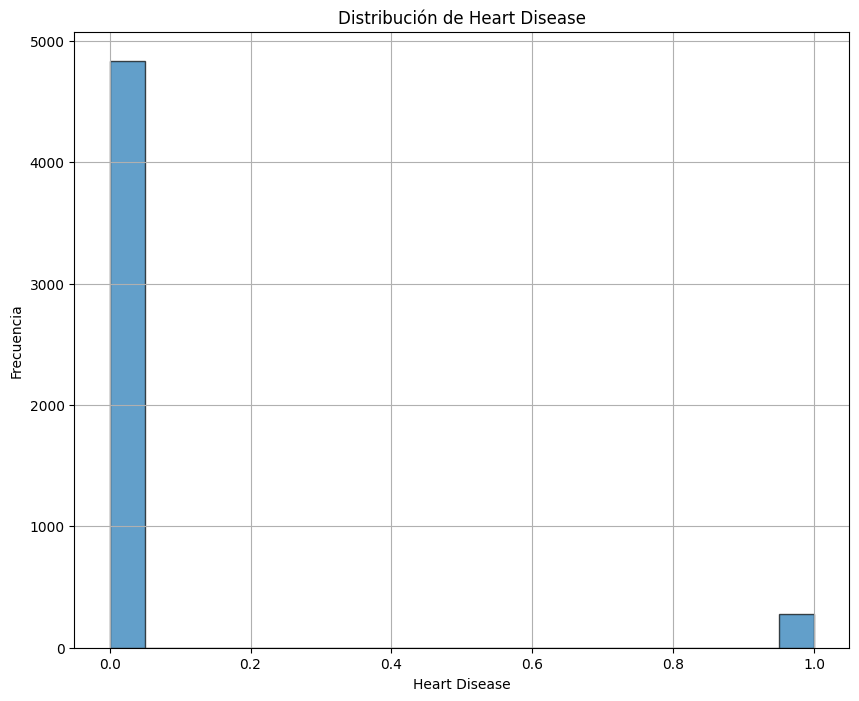

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.hist(df2['heart_disease'], bins = 20, edgecolor = 'black', alpha = 0.7)
plt.title('Distribución de Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [11]:
#Con esto puedo decir que hay más personas sin problemas de corazón
import plotly.express as px

fig = px.box(df2, y = 'age', title='Distribución de age')
fig.show()

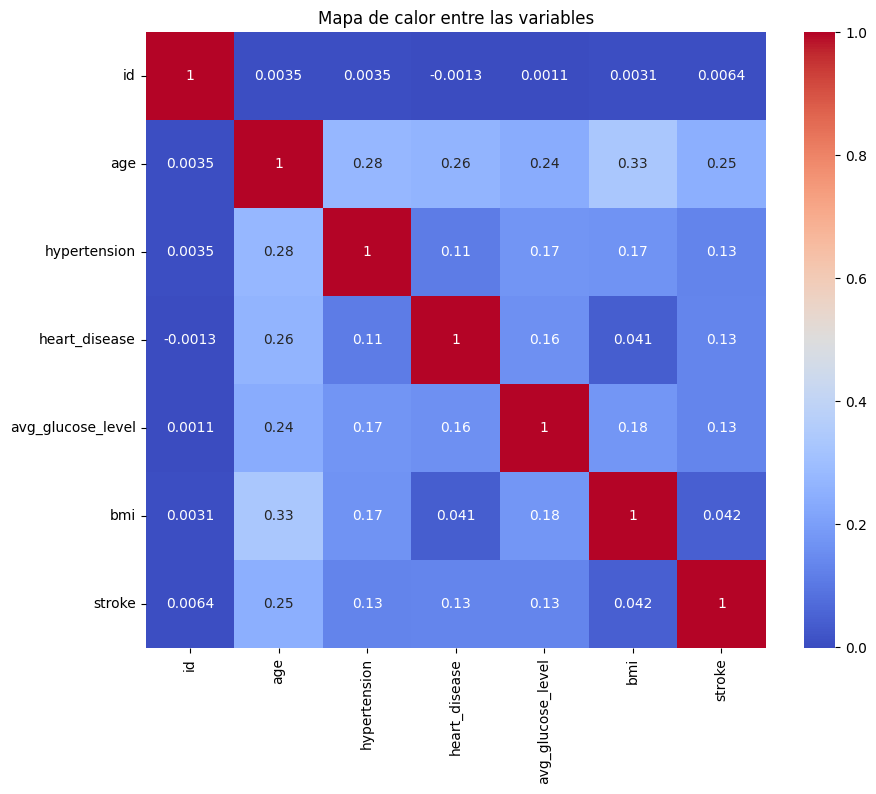

In [12]:
#Con este gráfico puedo decir que de 61 a 25 es el rango de edad más comun en el
#dataset. No veo valores atípicos.
import seaborn as sns
df2_numeric = df2.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
correlation_matrix = df2_numeric.corr()
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Mapa de calor entre las variables')
plt.show()

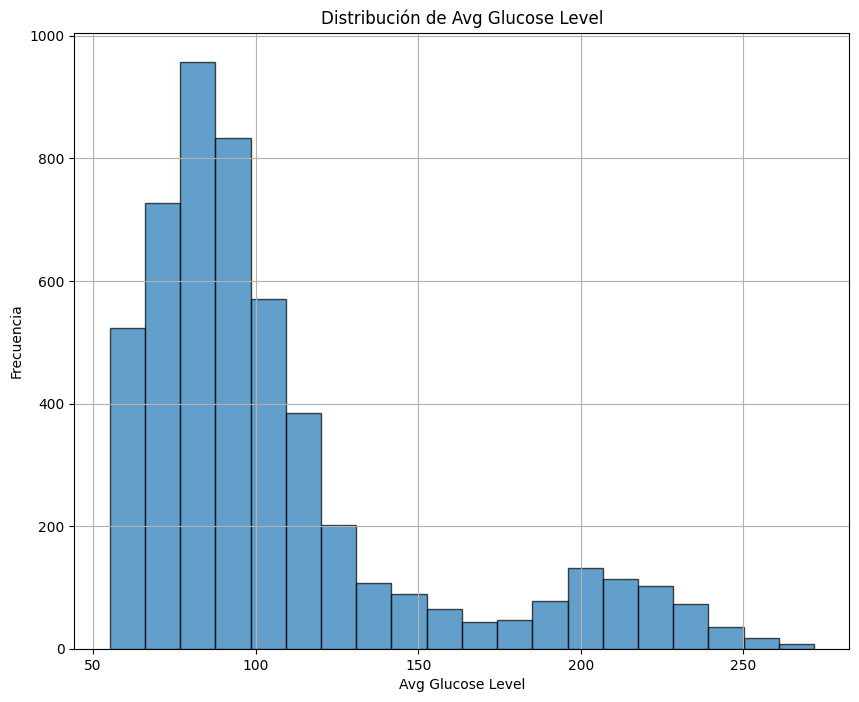

In [14]:
#No veo valores que tengan una muy alta correlación. No puedo decir que uno varía
#y que otra variable varía fuertemente a la par.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.hist(df2['avg_glucose_level'], bins = 20, edgecolor = 'black', alpha = 0.7)
plt.title('Distribución de Avg Glucose Level')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [15]:
#La distribución asimétrica positiva (sesgada hacia la derecha), lo que indica que 
#la mayoría de los valores de glucosa promedio están concentrados en el rango de 50 a 100
#Veo valores no muy comunes por encima de 250


Conclusión inicial

Para esta problemática, elijo la clasificación, con base el dataset que está relacionado con la predicción de accidentes cerebrovasculares.

La detección temprana de riesgos de accidentes cerebrovasculares puede salvar vidas. Este problema tiene impacto directo en la salud y en la toma de decisiones.

Su desafío puede darse porque hay muchos datos con que no haya accidentes a que haya, este es un desafío al entrenar modelos porque pueden sesgarse hacia el mayor.

Se necesita preprocesamiento por los tipos de datos diferentes.

In [6]:
# Hago los modelos predictivos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df2 = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/healthcare-dataset-stroke-data.csv')

#Selecciono la variable objetivo y la separo
X = df2.drop('stroke', axis = 1) 
y = df2['stroke'] 

#Ahora divido los conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Ahora hago el pipeline, utilizo pipeline porque lo utilicé en otros proyectos y la verdad que me gusta mucho su funcionamiento.

num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

#Creo los modelos
pipeline_LR = Pipeline(steps=[
    ('preprocessor', preprocessor), #Con esto llamo al preprocesamiento hecho más arriba
    ('classifier', LogisticRegression())
])

pipeline_KNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5)) 
])

pipeline_DT = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42))
])

pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42))
])

pipeline_XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])

#Entreno los modelos 
pipeline_LR.fit(X_train, y_train)
pipeline_KNN.fit(X_train, y_train)
pipeline_DT.fit(X_train, y_train)
pipeline_RF.fit(X_train, y_train)
pipeline_XGB.fit(X_train, y_train)

#Hago las predicciones
y_pred_LR = pipeline_LR.predict(X_test)
y_pred_KNN = pipeline_KNN.predict(X_test)
y_pred_DT = pipeline_DT.predict(X_test)
y_pred_RF = pipeline_RF.predict(X_test)
y_pred_XGB = pipeline_XGB.predict(X_test)

#Una vez hecho todo esto, evalúo los modelos
print(f'Reporte del modelo Logistic Regression:')
print(classification_report(y_test, y_pred_LR))

print(f'Reporte del modelo K-Nearest Neighbors:')
print(classification_report(y_test, y_pred_KNN))

print(f'Reporte del modelo Decision Tree:')
print(classification_report(y_test, y_pred_DT))

print(f'Reporte del modelo Random Forest:')
print(classification_report(y_test, y_pred_RF))

print(f'Reporte del modelo XGBoost:')
print(classification_report(y_test, y_pred_XGB))

#También puedo comparar el accuracy de cada uno
accuracy_LR = accuracy_score(y_test, y_pred_LR)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)

#Puedo hacer un diccionario para que sea más facil mostrarlo
results = {
    'Model':["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [accuracy_LR, accuracy_KNN, accuracy_DT, accuracy_RF, accuracy_XGB]
}

results_df = pd.DataFrame(results)
print(results_df)

Reporte del modelo Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Reporte del modelo K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Reporte del modelo Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.15      0.11      0.13        62

    accuracy                           0.91      1022
   macro avg  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [8]:
from sklearn.model_selection import cross_val_score

# Validación cruzada 
scores_LR = cross_val_score(pipeline_LR, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression - Mean Accuracy:", scores_LR.mean())
print("Logistic Regression - Std Accuracy:", scores_LR.std())

scores_KNN = cross_val_score(pipeline_KNN, X_train, y_train, cv=5, scoring='accuracy')
print("K-Nearest Neighbors - Mean Accuracy:", scores_KNN.mean())
print("K-Nearest Neighbors - Std Accuracy:", scores_KNN.std())

scores_DT = cross_val_score(pipeline_DT, X_train, y_train, cv=5, scoring='accuracy')
print("Decision Tree - Mean Accuracy:", scores_DT.mean())
print("Decision Tree - Std Accuracy:", scores_DT.std())

scores_RF = cross_val_score(pipeline_RF, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest - Mean Accuracy:", scores_RF.mean())
print("Random Forest - Std Accuracy:", scores_RF.std())

scores_XGB = cross_val_score(pipeline_XGB, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost - Mean Accuracy:", scores_XGB.mean())
print("XGBoost - Std Accuracy:", scores_XGB.std())


Logistic Regression - Mean Accuracy: 0.9545013811038656
Logistic Regression - Std Accuracy: 0.0008947666578094714
K-Nearest Neighbors - Mean Accuracy: 0.9532779894240064
K-Nearest Neighbors - Std Accuracy: 0.0016204369779300363
Decision Tree - Mean Accuracy: 0.911451341152107
Decision Tree - Std Accuracy: 0.009337112856510309
Random Forest - Mean Accuracy: 0.9537672862431281
Random Forest - Std Accuracy: 0.0009064070128164355
XGBoost - Mean Accuracy: 0.9471628266093676
XGBoost - Std Accuracy: 0.003738385360286741


In [9]:
#Logistic Regression es el mejor modelo por su precisión más alta (95.45%) y su desviación estándar baja.

# Data Set 3

In [16]:
import pandas as pd

df3 = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/house_price_regression_dataset.csv')
print(df3.head())

   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [20]:
#Calculo la cantidad de datos nulos
df3.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [21]:
#No tenemos datos nulos... Ahora veo los tipos de datos
print(df3.dtypes)

Square_Footage            int64
Num_Bedrooms              int64
Num_Bathrooms             int64
Year_Built                int64
Lot_Size                float64
Garage_Size               int64
Neighborhood_Quality      int64
House_Price             float64
dtype: object


In [23]:
#Los tipos de datos son correctos...
print(df3.describe())

       Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     2.778087   
std       1255.514921      1.427564       0.820332    20.632916     1.297903   
min        503.000000      1.000000       1.000000  1950.000000     0.506058   
25%       1749.500000      2.000000       1.000000  1969.000000     1.665946   
50%       2862.500000      3.000000       2.000000  1986.000000     2.809740   
75%       3849.500000      4.000000       3.000000  2004.250000     3.923317   
max       4999.000000      5.000000       3.000000  2022.000000     4.989303   

       Garage_Size  Neighborhood_Quality   House_Price  
count  1000.000000           1000.000000  1.000000e+03  
mean      1.022000              5.615000  6.188610e+05  
std       0.814973              2.887059  2.535681e+05  
min       0.000000              1.000000  1.116269e

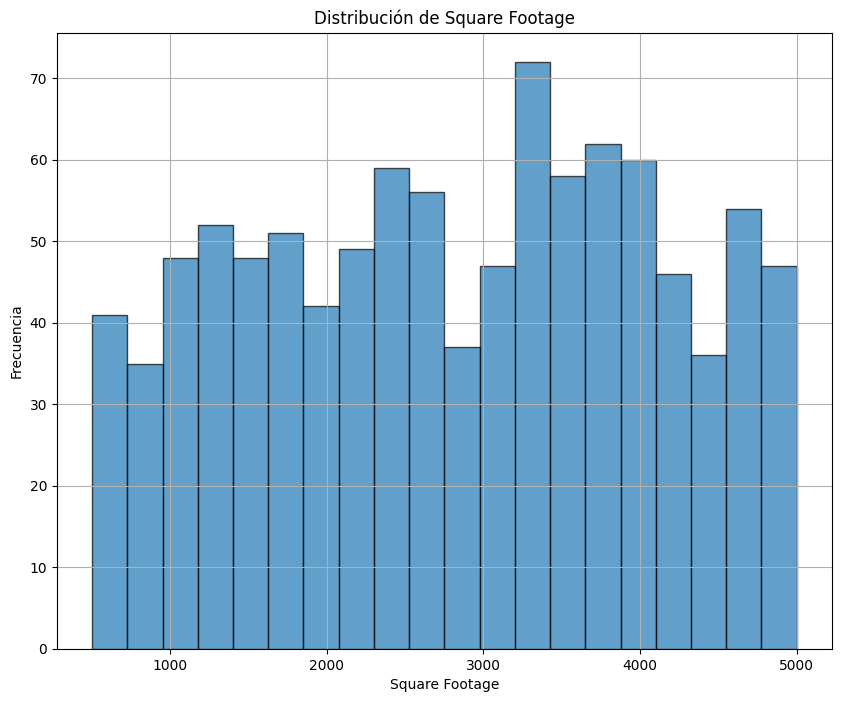

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.hist(df3['Square_Footage'], bins = 20, edgecolor = 'black', alpha = 0.7)
plt.title('Distribución de Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [26]:
#La distribución se ve uniforme, con algunas fluctuaciones. Esto indica que no
#hay un tamaño común.
#Parece estar dispersa de manera uniforme
# Con este gráfico vemos que los scores se concentran en ciertos valores específicos (como 30),
#también hay menos datos en otros rasgos...
import plotly.express as px

fig = px.box(df3, y = 'Lot_Size', title='Distribución de Lot Size')
fig.show()

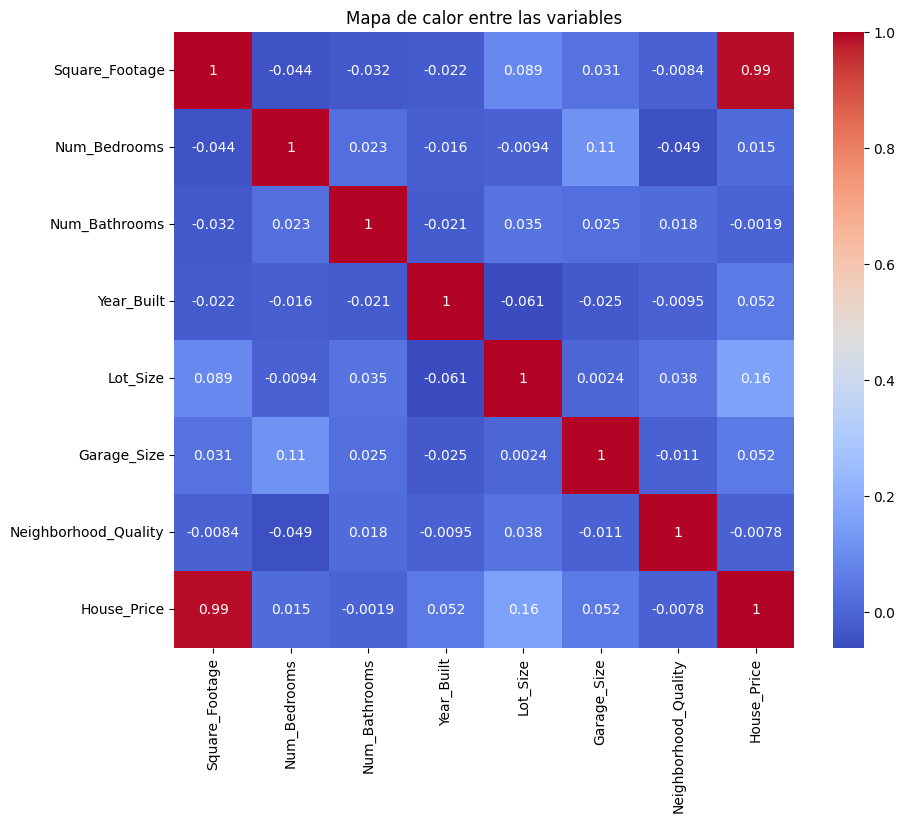

In [27]:
#Por lo que puedo observar, comúnmente el tamaño del lote se encuentra entre,
#1.6 y 3.9. No observo valores atípicos. La media está en 2.8, lo que nos indica
#que es prácticamente simétrica.
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = df3.corr()
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Mapa de calor entre las variables')
plt.show()

In [28]:
#Lo que tiene una correlación muy fuerte es el precio de la casa con square footage-
#Esto quiere decir que a mayor Square_Footage, mayor el precio de la casa.

Conclusión inicial

Elijo la regresión de precios.

Porque la predicción de los precios es un problema clave en la industria inmobiliaria. Se puede beneficiar a los compradores y vendedores tener una estimación precisa del precio.

Los desafíos pueden ser que haya un sesgo de los datos, que hace al modelado más complejo.

Tenemos una mezcla de tipos de datos, lo que rquiere un preprocesamiento avanzado.

In [18]:
# Hago los modelos predictivos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df3 = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/house_price_regression_dataset.csv')

#Selecciono la variable objetivo y la separo
X = df3.drop('House_Price', axis = 1) 
y = df3['House_Price'] 

#Ahora divido los conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Ahora hago el pipeline, utilizo pipeline porque lo utilicé en otros proyectos y la verdad que me gusta mucho su funcionamiento.

num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creo los modelos
pipeline_LR = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocesamiento definido previamente
    ('regressor', LinearRegression())
])

pipeline_KNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

pipeline_DT = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(criterion='squared_error', max_depth=None, random_state=42))
])

pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, random_state=42))
])

pipeline_XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(eval_metric='rmse', random_state=42))
])

# Entreno los modelos
pipeline_LR.fit(X_train, y_train)
pipeline_KNN.fit(X_train, y_train)
pipeline_DT.fit(X_train, y_train)
pipeline_RF.fit(X_train, y_train)
pipeline_XGB.fit(X_train, y_train)

# Hago las predicciones
y_pred_LR = pipeline_LR.predict(X_test)
y_pred_KNN = pipeline_KNN.predict(X_test)
y_pred_DT = pipeline_DT.predict(X_test)
y_pred_RF = pipeline_RF.predict(X_test)
y_pred_XGB = pipeline_XGB.predict(X_test)

# Evalúo los modelos
mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_KNN = mean_squared_error(y_test, y_pred_KNN)
mse_DT = mean_squared_error(y_test, y_pred_DT)
mse_RF = mean_squared_error(y_test, y_pred_RF)
mse_XGB = mean_squared_error(y_test, y_pred_XGB)

r2_LR = r2_score(y_test, y_pred_LR)
r2_KNN = r2_score(y_test, y_pred_KNN)
r2_DT = r2_score(y_test, y_pred_DT)
r2_RF = r2_score(y_test, y_pred_RF)
r2_XGB = r2_score(y_test, y_pred_XGB)

# Puedo hacer un diccionario para mostrar los resultados
results = {
    'Model': ["Linear Regression", "KNN Regressor", "Decision Tree Regressor", "Random Forest Regressor", "XGBoost Regressor"],
    "Mean Squared Error": [mse_LR, mse_KNN, mse_DT, mse_RF, mse_XGB],
    "R2 Score": [r2_LR, r2_KNN, r2_DT, r2_RF, r2_XGB]
}

results_df = pd.DataFrame(results)
print(results_df)


                     Model  Mean Squared Error  R2 Score
0        Linear Regression        1.014348e+08  0.998426
1            KNN Regressor        6.986408e+09  0.891614
2  Decision Tree Regressor        9.863188e+08  0.984698
3  Random Forest Regressor        3.949631e+08  0.993873
4        XGBoost Regressor        3.070362e+08  0.995237


In [20]:
from sklearn.model_selection import cross_val_score
# Validación cruzada 
scores_LR = cross_val_score(pipeline_LR, X_train, y_train, cv=5, scoring='r2')
print("Linear Regression - Mean R2:", scores_LR.mean())
print("Linear Regression - Std R2:", scores_LR.std())

scores_KNN = cross_val_score(pipeline_KNN, X_train, y_train, cv=5, scoring='r2')
print("K-Nearest Neighbors Regressor - Mean R2:", scores_KNN.mean())
print("K-Nearest Neighbors Regressor - Std R2:", scores_KNN.std())

scores_DT = cross_val_score(pipeline_DT, X_train, y_train, cv=5, scoring='r2')
print("Decision Tree Regressor - Mean R2:", scores_DT.mean())
print("Decision Tree Regressor - Std R2:", scores_DT.std())

scores_RF = cross_val_score(pipeline_RF, X_train, y_train, cv=5, scoring='r2')
print("Random Forest Regressor - Mean R2:", scores_RF.mean())
print("Random Forest Regressor - Std R2:", scores_RF.std())

scores_XGB = cross_val_score(pipeline_XGB, X_train, y_train, cv=5, scoring='r2')
print("XGBoost Regressor - Mean R2:", scores_XGB.mean())
print("XGBoost Regressor - Std R2:", scores_XGB.std())

Linear Regression - Mean R2: 0.9985166137865891
Linear Regression - Std R2: 0.00011539231595505023
K-Nearest Neighbors Regressor - Mean R2: 0.8856570987490848
K-Nearest Neighbors Regressor - Std R2: 0.010217971328933227
Decision Tree Regressor - Mean R2: 0.9829472236478283
Decision Tree Regressor - Std R2: 0.0017770475107086409
Random Forest Regressor - Mean R2: 0.9918936369820288
Random Forest Regressor - Std R2: 0.0011011034106717197
XGBoost Regressor - Mean R2: 0.9940468451527584
XGBoost Regressor - Std R2: 0.0004854231724119797


In [21]:
#El mejor modelo es Linear Regression con un R2 de 99.85% y con una desviación muy pequeña.

# Data Set 4

In [29]:
import pandas as pd

df4 = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/heart_failure_clinical_records_dataset.csv')
print(df4.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [31]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [33]:
#Calculo la cantidad de datos nulos
df4.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [35]:
#No tenemos datos nulos... Ahora veo los tipos de datos
print(df4.dtypes)

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [36]:
#Corregiré un dato
df4['age'] = df4['age'].astype('int64')
print(df4.dtypes)

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [38]:
#Los tipos de datos son correctos...
print(df4.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.829431    0.431438                581.839465    0.418060   
std     11.894997    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

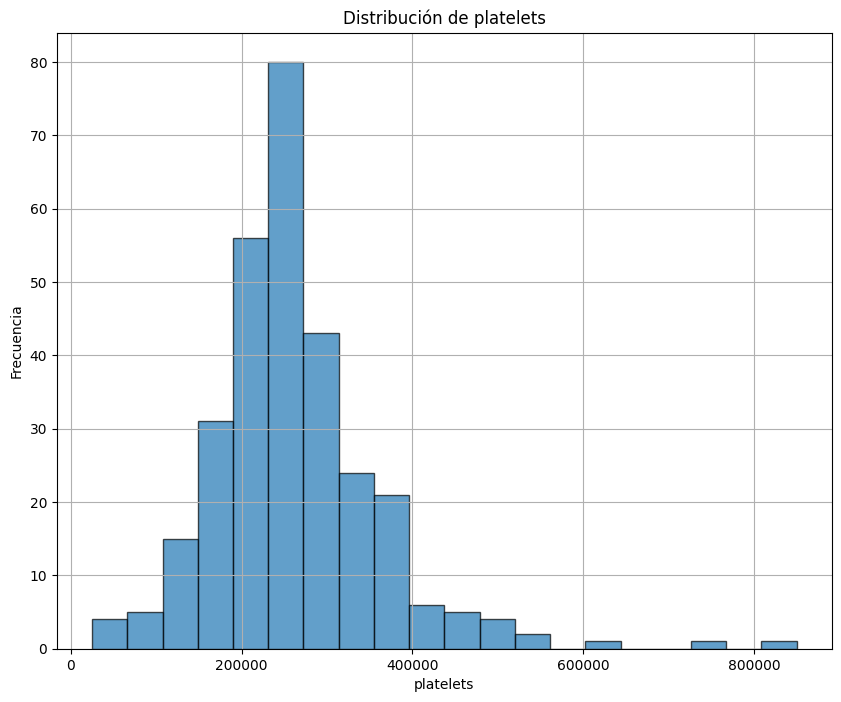

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.hist(df4['platelets'], bins = 20, edgecolor = 'black', alpha = 0.7)
plt.title('Distribución de platelets')
plt.xlabel('platelets')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.show()

In [42]:
#El gráfico tiene una asimetría positiva. Quiere decir que la mayoría de los valores están ubicados
#en ranfos bajos. Cerca de 200000 indica que es lo más que frecuenta.
import plotly.express as px

fig = px.box(df4, y = 'creatinine_phosphokinase', title='Distribución de creatinine_phosphokinase')
fig.show()

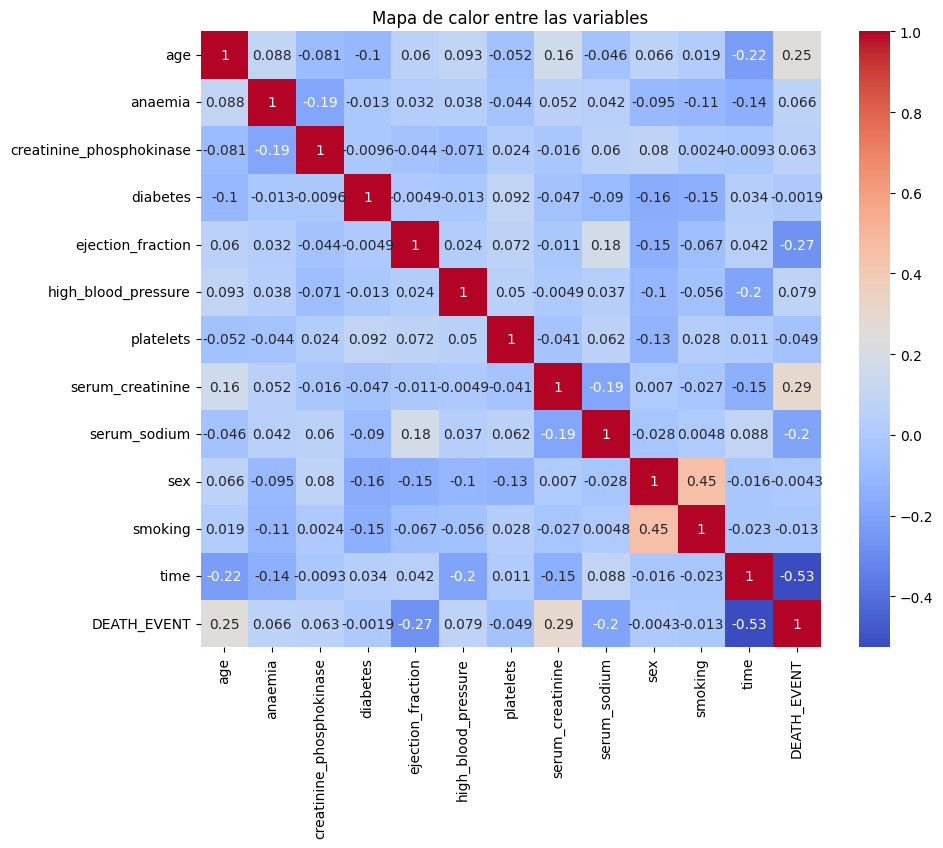

In [44]:
#Puedo ver unos cuantos outliers que podría analizar si tratarlos o no más adelante
#Se ven que son muchos datos, entonces debo tener cuidado al eliminar si es que quiero eliminarlos.
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = df4.corr()
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm')
plt.title('Mapa de calor entre las variables')
plt.show()

In [45]:
#Lo que veo con esto más influyente es smoking con sex pero no veo una correlación muy fuerte
#en general
#Veo ahora time con DEATH que tiene un -0.53. O sea a mayor time, menor death

Conclusión inicial

Para este data set, elijo la clasificación.

Con un buen modelo, podría ayudar a los médicos a identificar pacientes en alto riego y así
priorizar recursos. Se puede utilizar en hospitales para la vigilancia proactiva de pacientes.

Algunos desafíos son los datos limitados, porque como son datos médicos, suelen haber restricciones de privacidad, entonces no tengo tantos.

Los resultados deben estar bien porque los médicos deben confiar en ellos y tomar dicisiones informadas.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df4 = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/heart_failure_clinical_records_dataset.csv')

#Selecciono la variable objetivo y la separo
X = df4.drop('DEATH_EVENT', axis = 1) #Con esto selecciono todas las columnas, excepto charges
y = df4['DEATH_EVENT'] #Esta sería mi columna objetivo

#Ahora divido los conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Ahora hago el pipeline, utilizo pipeline porque lo utilicé en otros proyectos y la verdad que me gusta mucho su funcionamiento.

num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object', 'bool']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore') )
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)

#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

#Creo los modelos
pipeline_LR = Pipeline(steps=[
    ('preprocessor', preprocessor), #Con esto llamo al preprocesamiento hecho más arriba
    ('classifier', LogisticRegression())
])

pipeline_KNN = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5)) 
])

pipeline_DT = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42))
])

pipeline_RF = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42))
])

pipeline_XGB = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])

#Entreno los modelos 
pipeline_LR.fit(X_train, y_train)
pipeline_KNN.fit(X_train, y_train)
pipeline_DT.fit(X_train, y_train)
pipeline_RF.fit(X_train, y_train)
pipeline_XGB.fit(X_train, y_train)

#Hago las predicciones
y_pred_LR = pipeline_LR.predict(X_test)
y_pred_KNN = pipeline_KNN.predict(X_test)
y_pred_DT = pipeline_DT.predict(X_test)
y_pred_RF = pipeline_RF.predict(X_test)
y_pred_XGB = pipeline_XGB.predict(X_test)

#Una vez hecho todo esto, evalúo los modelos
print(f'Reporte del modelo Logistic Regression:')
print(classification_report(y_test, y_pred_LR))

print(f'Reporte del modelo K-Nearest Neighbors:')
print(classification_report(y_test, y_pred_KNN))

print(f'Reporte del modelo Decision Tree:')
print(classification_report(y_test, y_pred_DT))

print(f'Reporte del modelo Random Forest:')
print(classification_report(y_test, y_pred_RF))

print(f'Reporte del modelo XGBoost:')
print(classification_report(y_test, y_pred_XGB))

#También puedo comparar el accuracy de cada uno
accuracy_LR = accuracy_score(y_test, y_pred_LR)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)

#Puedo hacer un diccionario para que sea más facil mostrarlo
results = {
    'Model':["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [accuracy_LR, accuracy_KNN, accuracy_DT, accuracy_RF, accuracy_XGB]
}

results_df = pd.DataFrame(results)
print(results_df)

Reporte del modelo Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60

Reporte del modelo K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.65      0.97      0.78        35
           1       0.88      0.28      0.42        25

    accuracy                           0.68        60
   macro avg       0.76      0.63      0.60        60
weighted avg       0.75      0.68      0.63        60

Reporte del modelo Decision Tree:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71        35
           1       0.58      0.44      0.50        25

    accuracy                           0.63        60
   macro avg  

In [12]:
from sklearn.model_selection import cross_val_score

# Validación cruzada 
scores_LR = cross_val_score(pipeline_LR, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression - Mean Accuracy:", scores_LR.mean())
print("Logistic Regression - Std Accuracy:", scores_LR.std())

scores_KNN = cross_val_score(pipeline_KNN, X_train, y_train, cv=5, scoring='accuracy')
print("K-Nearest Neighbors - Mean Accuracy:", scores_KNN.mean())
print("K-Nearest Neighbors - Std Accuracy:", scores_KNN.std())

scores_DT = cross_val_score(pipeline_DT, X_train, y_train, cv=5, scoring='accuracy')
print("Decision Tree - Mean Accuracy:", scores_DT.mean())
print("Decision Tree - Std Accuracy:", scores_DT.std())

scores_RF = cross_val_score(pipeline_RF, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest - Mean Accuracy:", scores_RF.mean())
print("Random Forest - Std Accuracy:", scores_RF.std())

scores_XGB = cross_val_score(pipeline_XGB, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost - Mean Accuracy:", scores_XGB.mean())
print("XGBoost - Std Accuracy:", scores_XGB.std())

Logistic Regression - Mean Accuracy: 0.8322695035460992
Logistic Regression - Std Accuracy: 0.06461336901415517
K-Nearest Neighbors - Mean Accuracy: 0.7656028368794325
K-Nearest Neighbors - Std Accuracy: 0.03126480334453789
Decision Tree - Mean Accuracy: 0.7950354609929079
Decision Tree - Std Accuracy: 0.06752247025797373
Random Forest - Mean Accuracy: 0.8829787234042554
Random Forest - Std Accuracy: 0.05346781064634228
XGBoost - Mean Accuracy: 0.8495567375886525
XGBoost - Std Accuracy: 0.03990110252861245


In [13]:
#Viendo esto tengo que Random Forest ofrece la mejor combinación de precisión y robustez. Es el
#mejor modelo para esta predicción. Además se puede optimizar.